1.The chess problem


(a).

The primal LP:


\begin{align*}
\begin{aligned}
& \underset{s, l}{\text{maximize}}
& & 5s + 8l\\
& \text{subject to} 
\end{aligned} \\
&3s + 2l \leq 160\\
&s + 4l \leq 200\\
& s, l \geq 0
\end{align*}

In [28]:
using JuMP, Clp

m = Model(solver = ClpSolver())

@variable(m, s >= 0)
@variable(m, l >= 0)
@constraint(m, 3s + 2l <= 160)
@constraint(m, s + 4l <= 200)
@objective(m, Max, 5s + 8l)

status = solve(m)
println(status)
println("Number of small set to make: ", getvalue(s))
println("Number of large set to make: ", getvalue(l))
println("Profit: ", getobjectivevalue(m))

Optimal
Number of small set to make: 24.0
Number of large set to make: 44.0
Profit: 472.0


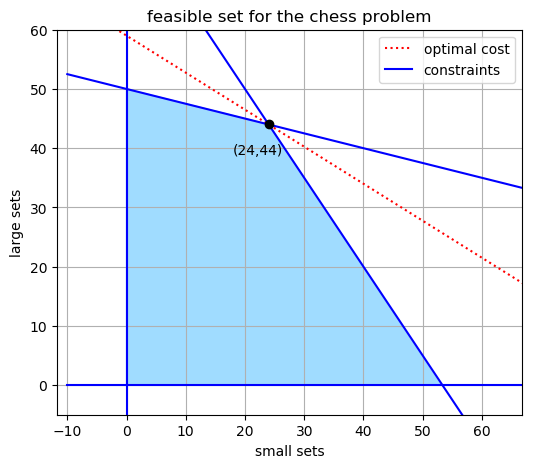

In [29]:
using PyPlot
figure(figsize=(6,5))

s = linspace(-10,90,3)

plot(s, 59 - 5/8*s, "r:")
# l = 0
plot(s, 0*s, "b-")
# s = 0
plot(0*s, s, "b-")
plot(s, 80 - 3/2*s, "b-")
plot(s, 50 - 1/4*s, "b-")
plot( 24, 44, "k.", markersize=12)
text( 18, 39, "(24,44)")
fill( [0, 0, 24, 53, 0], [0, 50, 44, 0, 0], color=(160/255,220/255,255/255) )
grid(); axis("equal"); axis([-5,60,-5,60]); 
xlabel("small sets");  ylabel("large sets")
legend(["optimal cost", "constraints"])
title("feasible set for the chess problem");

(b). The dual of the the primal is :


\begin{align*}
\begin{aligned}
& \underset{v1, v2}{\text{minimize}}
& & 160v1 + 200v2\\
& \text{subject to} 
\end{aligned} \\
&3v1 + v2 \geq 5\\
&2v1 + 4v2 \geq 8\\
& v1, v2 \geq 0
\end{align*}

In [30]:
using JuMP, Clp

m = Model(solver = ClpSolver())

@variable(m, v1 >= 0)
@variable(m, v2 >= 0)

@constraint(m, 3v1 + v2 >= 5)
@constraint(m, 2v1 + 4v2 >= 8)

@objective(m, Min, 160v1 + 200v2)

status = solve(m)

println(status)
println("v1: ", getvalue(v1))
println("v2: ", getvalue(v2))
println("profit: ", getobjectivevalue(m))

Optimal
v1: 1.1999999999999997
v2: 1.4000000000000001
profit: 471.99999999999994


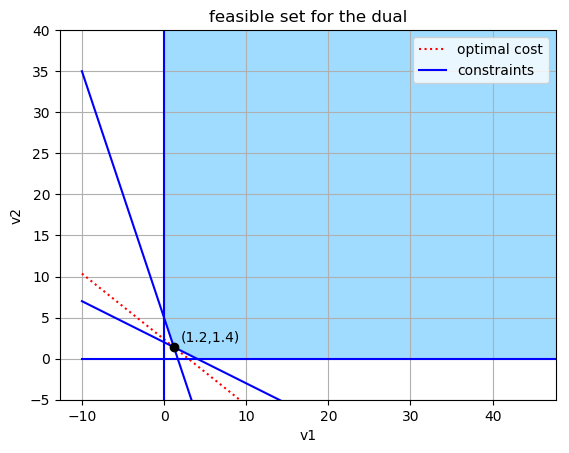

In [31]:
using PyPlot

v1 = linspace(-10,90,3)

plot(v1, 59/25 - 4/5*v1, "r:")
plot(v1, 0*v1, "b-")
plot(0*v1, v1, "b-")
plot(v1, 5 - 3*v1, "b-")
plot(v1, 2 - 1/2*v1, "b-")
plot( 1.2, 1.4, "k.", markersize=12)
text( 2, 2, "(1.2,1.4)")
fill( [0, 0, 1.2, 4, 70, 70], [60,5, 1.4, 0, 0, 60], color=(160/255,220/255,255/255) )
grid(); axis("equal"); axis([-5,40,-5,40]); 
xlabel("v1");  ylabel("v2")
legend(["optimal cost", "constraints"])
title("feasible set for the dual");

For the dual, we have the optimal point at v1 = 1.2 and v2 = 1.4. This gives us the objective = 160*1.2 + 200*1.4 = 472. The optimal result is the same as the primal.

 
2.
Stigler's supplement


(a).

In [32]:
# STARTER CODE FOR STIGLER'S DIET PROBLEM
using NamedArrays

# import Stigler's data set
raw = readcsv("stigler.csv")
(m,n) = size(raw)

# columns containing nutrients
n_nutrients = 2:n
# rows containing food names
n_foods = 3:m

# the list of nutrients (convert to 1-D array)
nutrients = raw[1,n_nutrients][:]
# the list of foods (convert to 1-D array)
foods = raw[n_foods,1][:]

# lower[i] is the minimum daily requirement of nutrient i.
lower = Dict( zip(nutrients,raw[2,n_nutrients]) )

# data[f,i] is the amount of nutrient i contained in food f.
data = NamedArray( raw[n_foods,n_nutrients], 
    (foods,nutrients), ("foods","nutrients") );

In [33]:
using JuMP, Clp
m = Model(solver = ClpSolver())

@variable(m, diet[foods] >= 0)
@constraint(m, constr[i in nutrients], 
    sum( data[s,i]*diet[s] for s in foods ) >= lower[i])
@expression(m, total_cost, sum(diet[s] for s in foods))
@objective(m, Min, total_cost)

status = solve(m)
println("We get the shadow price of the following: ")
println(getdual(constr))

We get the shadow price of the following: 
__anon__: 1 dimensions:
[    Calories (1000)] = 0.008765147298049492
[        Protein (g)] = 0.0
[        Calcium (g)] = 0.031737713445637035
[          Iron (mg)] = 0.0
[Vitamin A (1000 IU)] = 0.00040023272172538165
[      Thiamine (mg)] = 0.0
[    Riboflavin (mg)] = 0.016358032699276687
[        Niacin (mg)] = 0.0
[ Ascorbic Acid (mg)] = 0.00014411751545899702


Therefore, according to result, the shadow price for one gram of Calcium is 0.031737713445637035 dollar. Therefore, we want to pay 0.031737713445637035/2 = 0.015868856722818517 dollar for one Calcium pill(0.5 gram).

(b).

In [34]:
# STARTER CODE FOR STIGLER'S DIET PROBLEM
using NamedArrays

# import Stigler's data set
raw = readcsv("stigler_2_b.csv")
(m,n) = size(raw)

# columns containing nutrients
n_nutrients = 2:n
# rows containing food names
n_foods = 3:m

# the list of nutrients (convert to 1-D array)
nutrients = raw[1,n_nutrients][:]
# the list of foods (convert to 1-D array)
foods = raw[n_foods,1][:]

# lower[i] is the minimum daily requirement of nutrient i.
lower = Dict( zip(nutrients,raw[2,n_nutrients]) )

# data[f,i] is the amount of nutrient i contained in food f.
data = NamedArray( raw[n_foods,n_nutrients], 
    (foods,nutrients), ("foods","nutrients") );

In [35]:
using JuMP, Clp
m = Model(solver = ClpSolver())

@variable(m, diet[foods] >= 0)
@constraint(m, constr[i in nutrients], 
    sum( data[s,i]*diet[s] for s in foods ) >= lower[i])
@expression(m, total_cost, sum(diet[s] for s in foods))
@objective(m, Min, total_cost)

status = solve(m)
println("The new optimal diet: ")
println(getvalue(diet))
println()
println("New cost for a day is: ", getobjectivevalue(m))
println("New cost for a year is: ", getobjectivevalue(m)*365)

The new optimal diet: 
diet: 1 dimensions:
[ Wheat Flour (Enriched)] = 0.06598060307911847
[               Macaroni] = 0.0
[Wheat Cereal (Enriched)] = 0.0
[            Corn Flakes] = 0.0
[              Corn Meal] = 0.0
[           Hominy Grits] = 0.0
[                   Rice] = 0.0
[            Rolled Oats] = 0.0
[ White Bread (Enriched)] = 0.0
[      Whole Wheat Bread] = 0.0
[              Rye Bread] = 0.0
[             Pound Cake] = 0.0
[          Soda Crackers] = 0.0
[                   Milk] = 0.0
[  Evaporated Milk (can)] = 0.0
[                 Butter] = 0.0
[          Oleomargarine] = 0.0
[                   Eggs] = 0.0
[       Cheese (Cheddar)] = 0.0
[                  Cream] = 0.0
[          Peanut Butter] = 0.0
[             Mayonnaise] = 0.0
[                 Crisco] = 0.0
[                   Lard] = 0.0
[          Sirloin Steak] = 0.0
[            Round Steak] = 0.0
[              Rib Roast] = 0.0
[            Chuck Roast] = 0.0
[                  Plate] = 0.0
[           L

As we can see from the result, the new diet suggests that we should get slightly more on wheat flour and liver, and a little less on cabbage and spinach, and don't get any dried navy beans, and get 0.012433796310553268 worth of calcium pill.


This new diet will cost us 36.9982473745081 dollars instead of 39.6617 dollars for a year.

3.
Dual interpretation

(a).

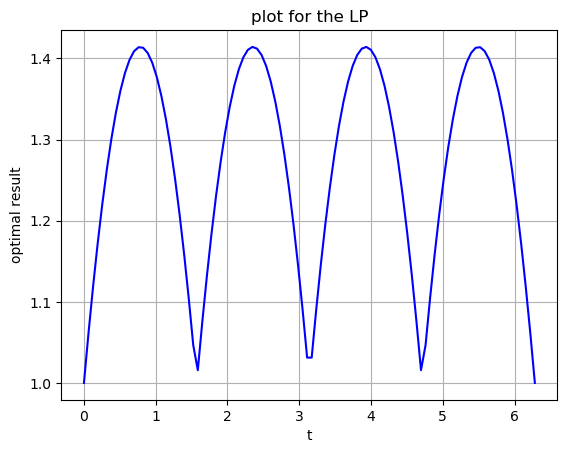

In [36]:
using JuMP, Clp, PyPlot

tvalue = linspace(0, 2*pi, 100)
t_list = []
result = []

for t in tvalue
    
    m = Model(solver = ClpSolver())

    @variable(m, p >= 0)
    @variable(m, q >= 0)
    @variable(m, r >= 0)
    @variable(m, s >= 0)
    
    @constraint(m, p - r == cos(t))
    @constraint(m, q - s == sin(t))
    @objective(m, Min, p + q + r + s)
    solve(m)

    push!(t_list, t)
    push!(result, getobjectivevalue(m))
end

plot(t_list, result, "b-")
grid()
xlabel("t");  ylabel("optimal result")
title("plot for the LP");


For this plot, to interpret this example, consider t for fout different values:


t = $\pi$/4


When t = $\pi$/4, sin(t) = cos(t) > 0, we have the optimal value for p = 0.7071067811865476, q = 0.7071067811865475, r = 0, s = 0. Therefore the optimal value is 1.414213562373095.


t = 3$\pi$/4


When t = 3$\pi$/4, sin(t) = 0.7071067811865476 > 0, cos(t) = -0.7071067811865475 < 0, therefore we have p = 0, q = 0.7071067811865476, r = 0.7071067811865475, s = 0. Therefore the optimal value is p + q + r + s = 1.414213562373095.


t = 5$pi$/4


When t = 5$pi$/4, sin(t) = -0.7071067811865475 < 0, cos(t) = -0.7071067811865477 < 0, therefore we have p = 0, q = 0, r = 0.7071067811865477, s = 0.7071067811865475. Therefore the optimal value is 1.4142135623730951.


t = 7$pi$/4


When t = 7$pi$/4, sin(t) = -0.7071067811865477 < 0, cos(t) = 0.7071067811865474 > 0, therefore we have p = 0.7071067811865474, q = 0, r = 0, s = 0.7071067811865477. Therefore the optimal value is 1.414213562373095.

(b).


The dual is:

\begin{align*}
\begin{aligned}
& \underset{v1, v2}{\text{maximize}}
& & cos(t)*v1 - sin(t)*v2 \\
& \text{subject to} 
\end{aligned} \\
&v1 \leq 1\\
&v2 \leq 1\\
&-v1 \leq 1\\
&-v2\leq 1\\
& v1 free\\
& v2 free
\end{align*}

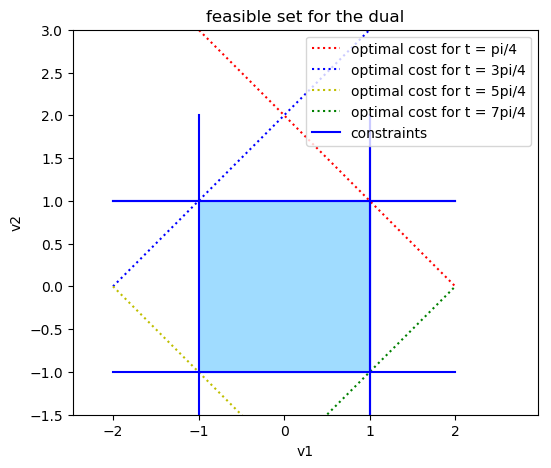

In [37]:
using JuMP, Clp, PyPlot
figure(figsize=(6,5))

v1 = linspace(-2, 2, 5)
a = [1, 1, 1, 1, 1]

plot(v1, (0.7071067811865475+0.7071067811865476)/0.7071067811865475 - v1, "r:")
plot(v1, (0.7071067811865475+0.7071067811865476)/0.7071067811865476 + v1, "b:")
plot(v1, -(0.7071067811865475+0.7071067811865476)/0.7071067811865476 - v1, "y:")
plot(v1, -(0.7071067811865475+0.7071067811865476)/0.7071067811865476 + v1, "g:")
plot(v1, a, "b-")
plot(a, v1, "b-")
plot(v1, -a, "b-")
plot(-a, v1, "b-")
plot(v1, a, "b-")
plot(a, v1, "b-")
fill( [-1, -1, 1, 1], [-1, 1, 1, -1], color=(160/255,220/255,255/255) )
axis("equal"); axis([-1.5,2,-1.5,3]); 
xlabel("v1");ylabel("v2")
legend(["optimal cost for t = pi/4", "optimal cost for t = 3pi/4", 
        "optimal cost for t = 5pi/4", "optimal cost for t = 7pi/4","constraints"])
title("feasible set for the dual");

As we can see, in the case when t = $pi$/4, the optimal value for v1 is 1, the optimal value for v2 is 1. This gives the optimal solution: cos(t)*1 + sin(t)*1 = 1.414213562373095. Which is the same as what we got from question(a).

To further prove this, we can solve the dual LP:

In [38]:
using JuMP, Clp, PyPlot

m = Model(solver = ClpSolver())

@variable(m, v1)
@variable(m, v2)

@constraint(m, v1 <= 1)
@constraint(m, v2 <= 1)
@constraint(m, -v1 <= 1)
@constraint(m, -v2 <= 1)

@objective(m, Max, cos(pi/4)*v1 + sin(pi/4)*v2)

status = solve(m)
println("v1: ", getvalue(v1))
println("v2: ", getvalue(v2))
println("optimal solution: ", getobjectivevalue(m))

v1: 1.0
v2: 1.0
optimal solution: 1.414213562373095


Which gives us the same solution as when we solve it graphly.

We can also try to plot the optimal opjective as a function of t using the dual LP:

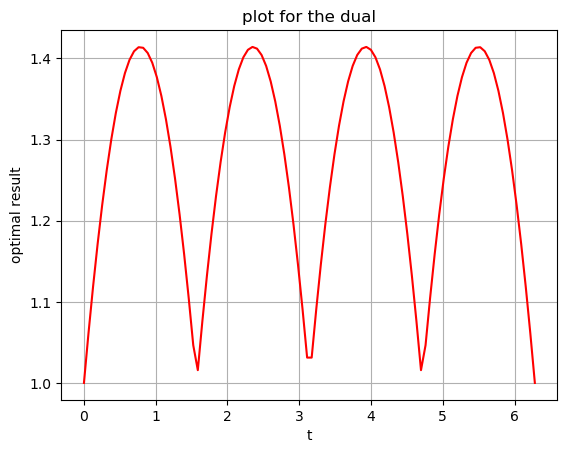

In [39]:
using JuMP, Clp, PyPlot

tvalue = linspace(0, 2*pi, 100)
t_list = []
result = []

for t in tvalue
    
    m = Model(solver = ClpSolver())
    
    @variable(m, v1)
    @variable(m, v2)

    @constraint(m, v1 <= 1)
    @constraint(m, v2 <= 1)
    @constraint(m, -v1 <= 1)
    @constraint(m, -v2 <= 1)

    
    @objective(m, Max, cos(t)*v1 + sin(t)*v2)
    
    solve(m)
    push!(t_list, t)
    push!(result, getobjectivevalue(m))
end

plot(t_list, result, "r-")
grid()
xlabel("t");  ylabel("optimal result")
title("plot for the dual");

According to the plot above, the optimal result is roughly 1.42.

The plot of the dual problem is the same as the plot of primal problem. They give the same solution.